In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file "biking_datafile.csv" into a dataframe, using custom column names
# The columns in the CSV file will be mapped to the specified column names: "time", "duration", and "biketype"

df = pd.read_csv("bike_share.csv", names=["time","duration","biketype"])

# Display the first five rows of the dataframe
df.head()

,time,duration,biketype
0,06:00,21,mountain
1,06:00,27,mountain
2,06:00,23,mountain
3,06:01,11,road
4,06:02,23,mountain


In [3]:
# Display the shape of the dataframe, which is a tuple representing the dimensions (rows, columns)
# This provides the number of rows and columns in the dataframe

df.shape

(3043, 3)

In [4]:
# Display concise information about the dataframe 
# This includes the data types of columns, non-null counts, and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      3043 non-null   object
 1   duration  3043 non-null   int64 
 2   biketype  3043 non-null   object
dtypes: int64(1), object(2)
memory usage: 71.4+ KB


In [5]:
# Convert the "duration" column to the data type float64
df["duration"] = df["duration"].astype("float64")

# Convert the "biketype" column to the data type category
df["biketype"] = df["biketype"].astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3043 entries, 0 to 3042
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   time      3043 non-null   object  
 1   duration  3043 non-null   float64 
 2   biketype  3043 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 50.8+ KB


In [7]:
# Convert time string to a datetime object
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

# Calculate hours and fractions of an hour
df['time1'] = df['time'].dt.hour + df['time'].dt.minute / 60.0

print(df)

                    time  duration  biketype      time1
0    1900-01-01 06:00:00      21.0  mountain   6.000000
1    1900-01-01 06:00:00      27.0  mountain   6.000000
2    1900-01-01 06:00:00      23.0  mountain   6.000000
3    1900-01-01 06:01:00      11.0      road   6.016667
4    1900-01-01 06:02:00      23.0  mountain   6.033333
...                  ...       ...       ...        ...
3038 1900-01-01 22:00:00      30.0      road  22.000000
3039 1900-01-01 22:00:00      23.0      road  22.000000
3040 1900-01-01 22:00:00      21.0      road  22.000000
3041 1900-01-01 22:00:00      20.0      road  22.000000
3042 1900-01-01 22:00:00      17.0      road  22.000000

[3043 rows x 4 columns]


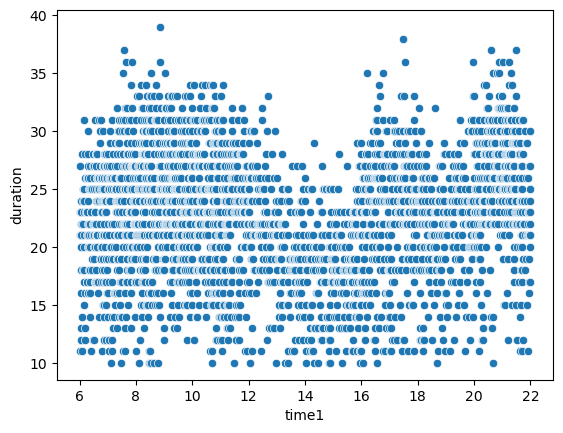

In [8]:
# Create a scatter plot using seaborn, plotting "time1" on the x-axis and "duration" on the y-axis
sns.scatterplot(data=df, x="time1", y="duration")

# Display the plot
plt.show()

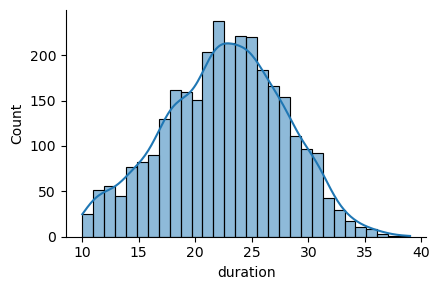

In [9]:
# Create a distribution plot using seaborn, plotting the "duration" column
# Setting the number of bins to 30, enabling KDE (Kernel Density Estimation),
# and adjusting the height and aspect ratio of the plot
sns.displot(data=df, x="duration", bins=30, kde=True, height=3,aspect=1.5)

plt.show()

In [10]:
# We use the pd.cut() function to divide the "time" column into 16 intervals (bins) as there are 16 hours in the data i.e. 6 to 22
# include the leftmost interval, and create a categorical representation.
# By applying .value_counts(normalize=True) to the categorical data, we get the relative frequency of each interval as a percentage.

round(pd.cut(df["time"],bins=16,right=False,include_lowest=True).value_counts(normalize=True).sort_index()*100,2)

[1900-01-01 06:00:00, 1900-01-01 07:00:00)           6.74
[1900-01-01 07:00:00, 1900-01-01 08:00:00)           7.82
[1900-01-01 08:00:00, 1900-01-01 09:00:00)           8.97
[1900-01-01 09:00:00, 1900-01-01 10:00:00)           8.97
[1900-01-01 10:00:00, 1900-01-01 11:00:00)           8.35
[1900-01-01 11:00:00, 1900-01-01 12:00:00)           6.80
[1900-01-01 12:00:00, 1900-01-01 13:00:00)           4.53
[1900-01-01 13:00:00, 1900-01-01 14:00:00)           4.04
[1900-01-01 14:00:00, 1900-01-01 15:00:00)           3.88
[1900-01-01 15:00:00, 1900-01-01 16:00:00)           5.16
[1900-01-01 16:00:00, 1900-01-01 17:00:00)           6.28
[1900-01-01 17:00:00, 1900-01-01 18:00:00)           5.42
[1900-01-01 18:00:00, 1900-01-01 19:00:00)           5.13
[1900-01-01 19:00:00, 1900-01-01 20:00:00)           4.47
[1900-01-01 20:00:00, 1900-01-01 21:00:00)           6.70
[1900-01-01 21:00:00, 1900-01-01 22:00:57.600000)    6.74
Name: time, dtype: float64

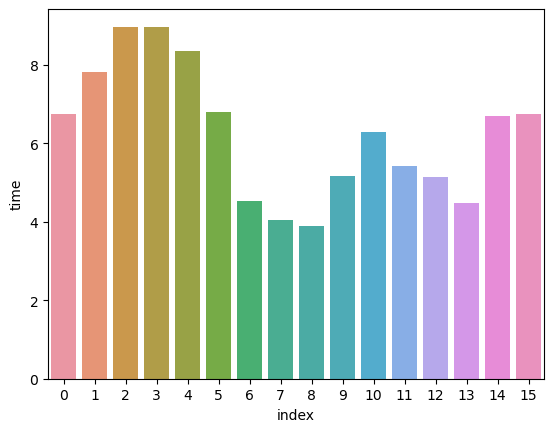

In [11]:
# Calculate the frequency distribution of "time" values into 16 bins, convert to percentages
freq = round(pd.cut(df["time"],bins=16,right=False,include_lowest=True, labels=False).value_counts(normalize=True).sort_index()*100,2).reset_index()

# Create a bar plot using Seaborn to show the distribution of time intervals
sns.barplot(data=freq,x="index", y="time")
plt.show()

In [13]:
# This code calculates the total sum of 'duration' for each hour of the day, providing insights into usage patterns

hours = df.groupby(df['time'].dt.hour)['duration'].sum().sort_index().reset_index()
hours

,time,duration
0,6,4448.0
1,7,5475.0
2,8,6498.0
3,9,6550.0
4,10,5957.0
5,11,4633.0
6,12,3035.0
7,13,2321.0
8,14,2094.0
9,15,2942.0


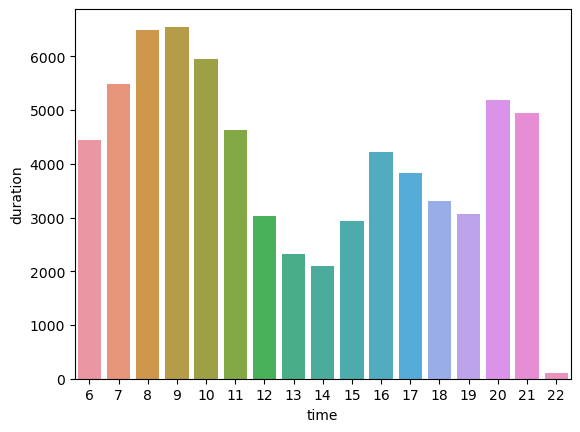

In [14]:
# Create a bar plot using Seaborn to show the total durations per hour of the day
sns.barplot(data=hours,x="time", y="duration")
plt.show()

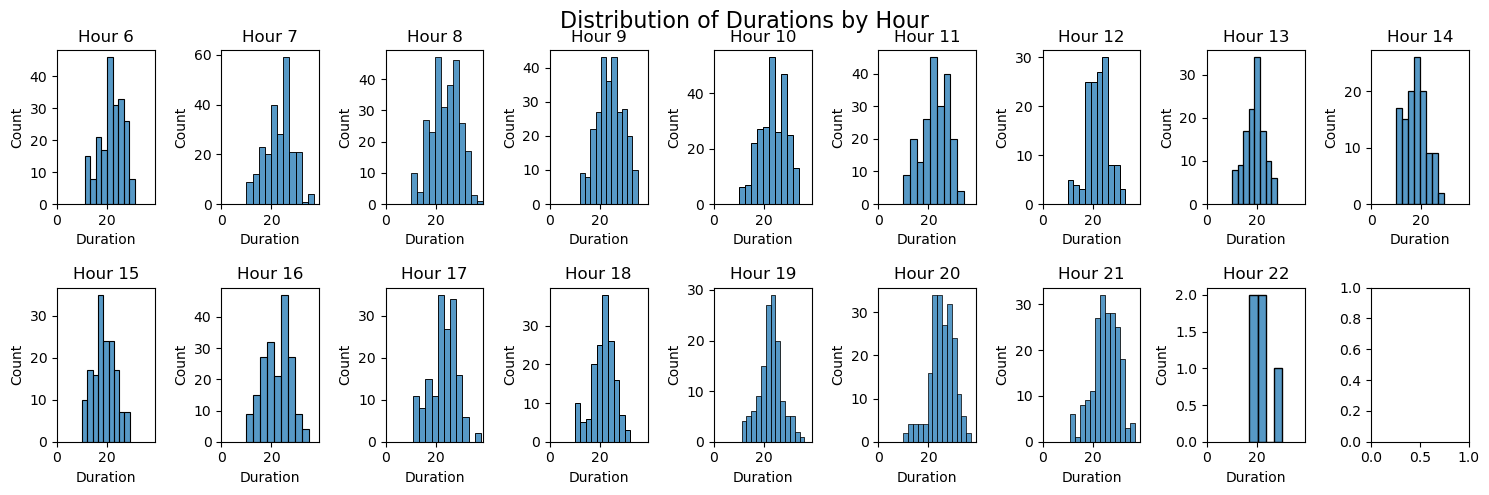

In [17]:
# Extract the hour from the 'time' column and create a new 'hour' column
df['hour'] = df['time'].dt.hour

# Set up the figure and subplots in a 5x4 grid with a specified figure size
fig, axes = plt.subplots(2, 9, figsize=(15, 5))

# Set the main title for the entire figure
fig.suptitle("Distribution of Durations by Hour", fontsize=16)

# Loop through each hour from 6 to 22
for hour in range(6, 23):
    # Calculate the row index based on the hour
    row = (hour - 6) // 9

    # Calculate the column index based on the hour
    col = (hour - 6) % 9
    
    # Select the appropriate subplot
    ax = axes[row, col]
    
    # Create a histogram plot for the current hour's duration values
    sns.histplot(df[df["hour"] == hour]["duration"], ax=ax)
    
    # Set the title, x-axis label, and y-axis label for the subplot
    ax.set_title(f"Hour {hour}")
    ax.set_xlabel("Duration")
    ax.set_ylabel("Count")

    # Adjust the x-axis limit if needed (optional)
    ax.set_xlim(0, df["duration"].max())  
    
# Optimize layout
plt.tight_layout()

# Adjust the placement of the main title
plt.subplots_adjust(top=0.9)

# Show the plots
plt.show()

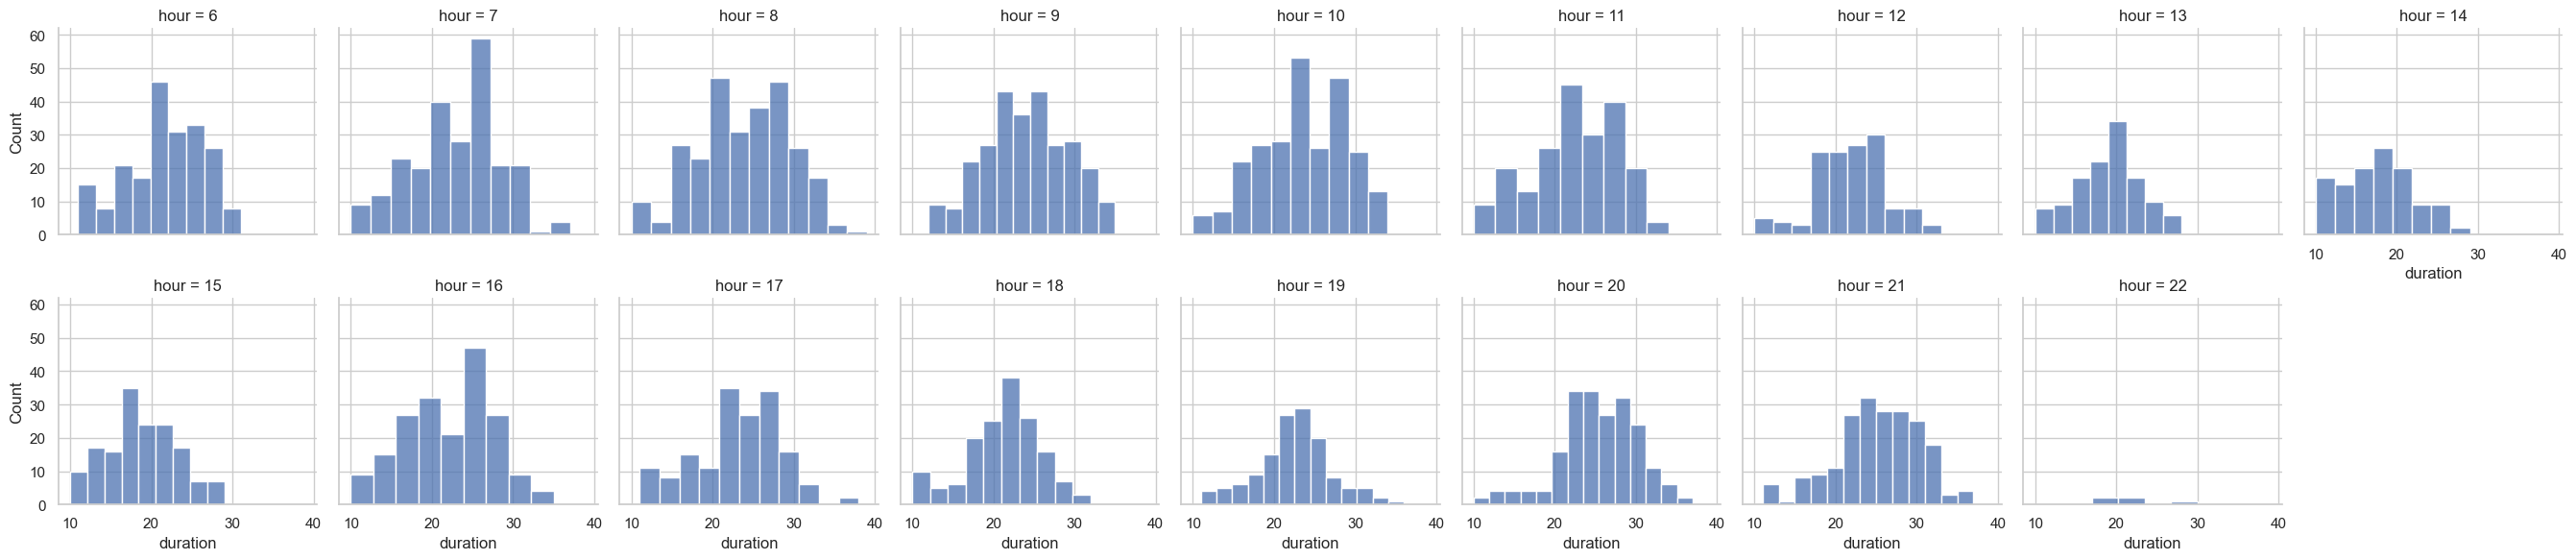

In [18]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Seaborn's whitegrid style is set, and a FacetGrid is created to display histograms of 'duration' across different hours.
# The col parameter specifies that each hour will have its own column. The col_wrap parameter controls the number of columns
# in the grid, and sharey=True ensures the y-axis is shared among subplots
g = sns.FacetGrid(df, col='hour', col_wrap=9, sharey=True)

# The FacetGrid is mapped with sns.histplot to generate histograms of 'duration' for each hour
g.map(sns.histplot, 'duration')

# Optimizing the arrangement of elements within the plot for better visualization
plt.tight_layout()
plt.show()

In [19]:
# Create a pivot table from the dataframe
# 'hour' as index, 'duration' as columns, sum as aggregation and filling the  missing values with 0

pivot_table = df.pivot_table(index='hour', columns='duration', aggfunc=np.sum, fill_value=0)
pivot_table

C:\Users\atuln\AppData\Local\Temp\ipykernel_21020\771366096.py:4: FutureWarning: The operation <function sum at 0x000002D81A049550> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  pivot_table = df.pivot_table(index='hour', columns='duration', aggfunc=np.sum, fill_value=0)


time1                                                  \
duration       10.0        11.0        12.0        13.0        14.0   
hour                                                                  
6          0.000000   25.316667   58.850000   12.266667   26.033333   
7         14.583333   29.350000   21.266667   29.950000   59.400000   
8         51.050000   24.950000    8.133333    8.300000   25.500000   
9          0.000000    0.000000   18.800000   27.816667   38.066667   
10        10.716667   21.300000   31.766667   10.850000   62.883333   
11        11.483333   34.866667   56.516667   33.833333  102.483333   
12        25.000000   24.550000   12.633333   50.533333    0.000000   
13        26.683333   40.516667   41.333333   13.100000  108.816667   
14        72.566667   71.633333  102.100000  131.100000   87.816667   
15        31.266667  109.666667   15.700000   92.783333  170.916667   
16        32.616667   66.066667   49.066667   83.083333   66.400000   
17         0.000000   86.983333   86.500000   17.066667   51.616667   
18        18.666667   55.850000  110.016667   55.116667   37.150000   
19         0.000000   38.833333   39.150000    0.000000   97.900000   
20        20.666667   20.166667   40.583333   40.950000   61.583333   
21         0.000000   65.216667   64.466667    0.000000   21.633333   
22         0.000000    0.000000    0.000000    0.000000    0.000000   

                                                                      ...  \
duration        15.0        16.0        17.0        18.0        19.0  ...   
hour                                                                  ...   
6          26.800000   51.200000   85.433333   64.733333   47.116667  ...   
7          22.450000   73.483333   75.716667   45.816667  105.016667  ...   
8          76.416667   68.650000   83.233333  102.750000   94.000000  ...   
9          48.100000   29.150000   95.566667  115.066667  123.533333  ...   
10         73.733333   96.383333   63.450000  187.566667   94.766667  ...   
11         90.866667   45.950000  104.216667  136.750000   68.083333  ...   
12          0.000000   36.350000  100.916667   86.983333  124.083333  ...   
13        121.200000  108.900000  148.816667  148.033333  215.416667  ...   
14         71.916667   73.150000  146.566667  158.800000  217.233333  ...   
15        124.783333  124.283333  279.783333  262.650000  247.750000  ...   
16         97.600000  213.250000   97.166667  132.666667  165.650000  ...   
17         87.683333   17.633333   52.100000  190.750000  105.450000  ...   
18         36.783333   74.233333   55.833333  313.000000  242.450000  ...   
19         77.133333   38.450000  116.716667   58.616667   97.600000  ...   
20         20.233333   40.533333   40.266667   40.850000   40.400000  ...   
21        128.533333   43.100000   86.616667  108.000000  129.166667  ...   
22          0.000000    0.000000   22.000000    0.000000    0.000000  ...   

                                                                               \
duration        30.0        31.0        32.0       33.0       34.0       35.0   
hour                                                                            
6          19.850000   26.166667    0.000000   0.000000   0.000000   0.000000   
7          60.200000   60.133333   38.100000   0.000000   7.816667   7.533333   
8         102.633333  119.466667   59.500000  59.000000  25.250000  17.083333   
9          95.233333  123.266667   65.166667  75.950000   9.933333   9.033333   
10        115.350000  146.383333   52.966667  21.116667  62.950000   0.000000   
11         45.333333   57.000000   23.166667  11.033333  11.083333   0.000000   
12         74.083333   12.483333   12.483333  12.683333   0.000000   0.000000   
13          0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
14          0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   
15          0.000000    0.000000    0.000000   0.000000   0.000000   0.000000   

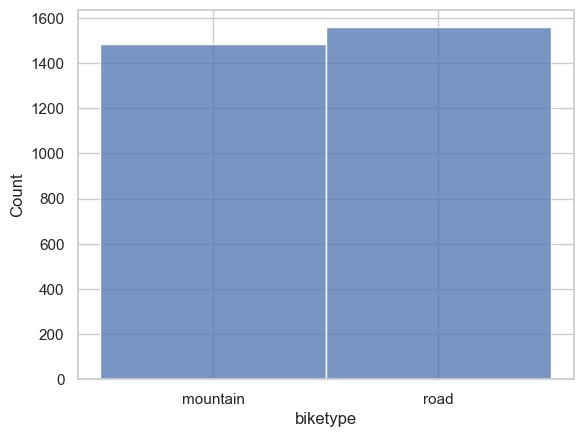

In [20]:
# Create a histogram plot using seaborn, plotting the "biketype" column from the dataframe
sns.histplot(df['biketype'])

plt.show()

<Axes: xlabel='biketype', ylabel='duration'>

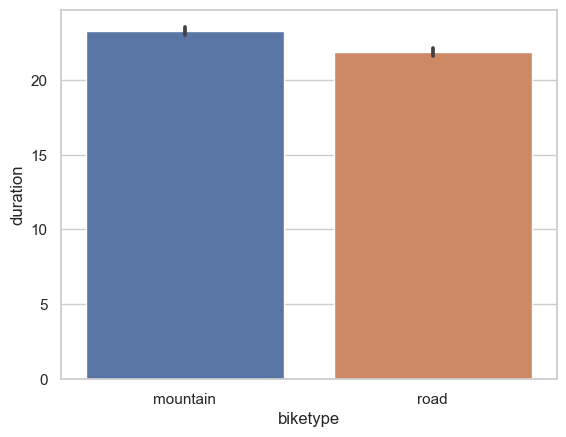

In [21]:
# Create a bar plot using seaborn, plotting "biketype" on the x-axis and "duration" on the y-axis

sns.barplot(data=df, x='biketype', y='duration')

<Axes: xlabel='duration', ylabel='Count'>

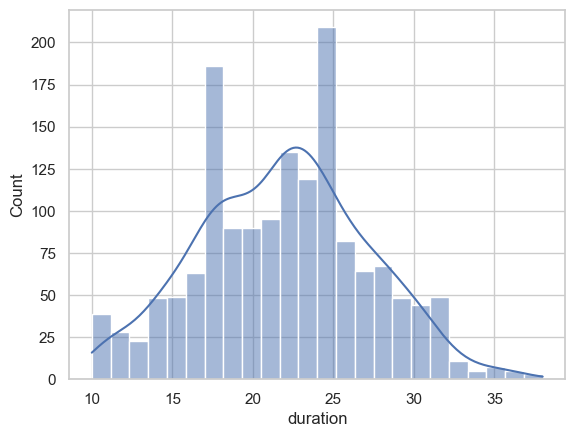

In [22]:
# Create a histogram plot of "duration" values for the 'road' bike type, with a KDE plot overlay
sns.histplot(df["duration"][df.biketype == 'road'], kde=True)

<Axes: xlabel='duration', ylabel='Count'>

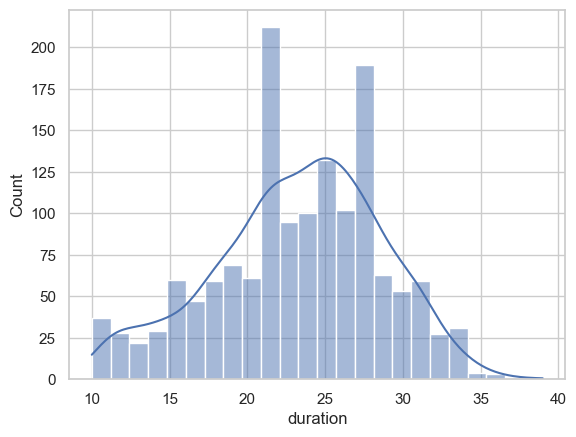

In [23]:
# Create a histogram plot of "duration" values for the 'mountain' bike type, with a KDE plot overlay
sns.histplot(df["duration"][df.biketype == 'mountain'], kde=True)

In [24]:
# Group the dataframe by "biketype" and calculate the mean of the "duration" column for each group
mean_durations_by_biketype = df.groupby("biketype")["duration"].mean()

# Display the resulting Series containing mean durations for each bike type
mean_durations_by_biketype

biketype
mountain    23.245957
road        21.870430
Name: duration, dtype: float64

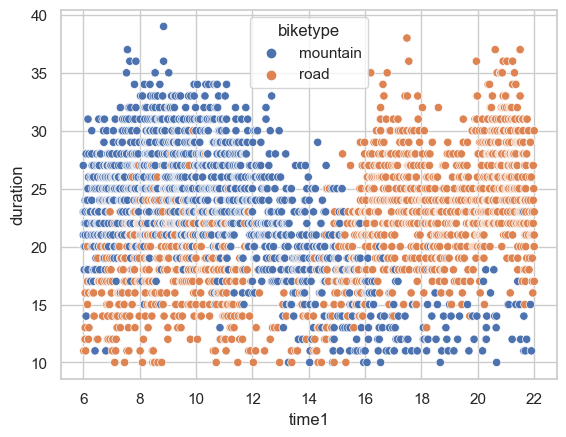

In [25]:
# Create a scatter plot using seaborn, plotting "time1" on the x-axis, "duration" on the y-axis,
# and using different colors (hue) for different bike types
sns.scatterplot(data=df, x="time1", y="duration",hue="biketype")
plt.show()

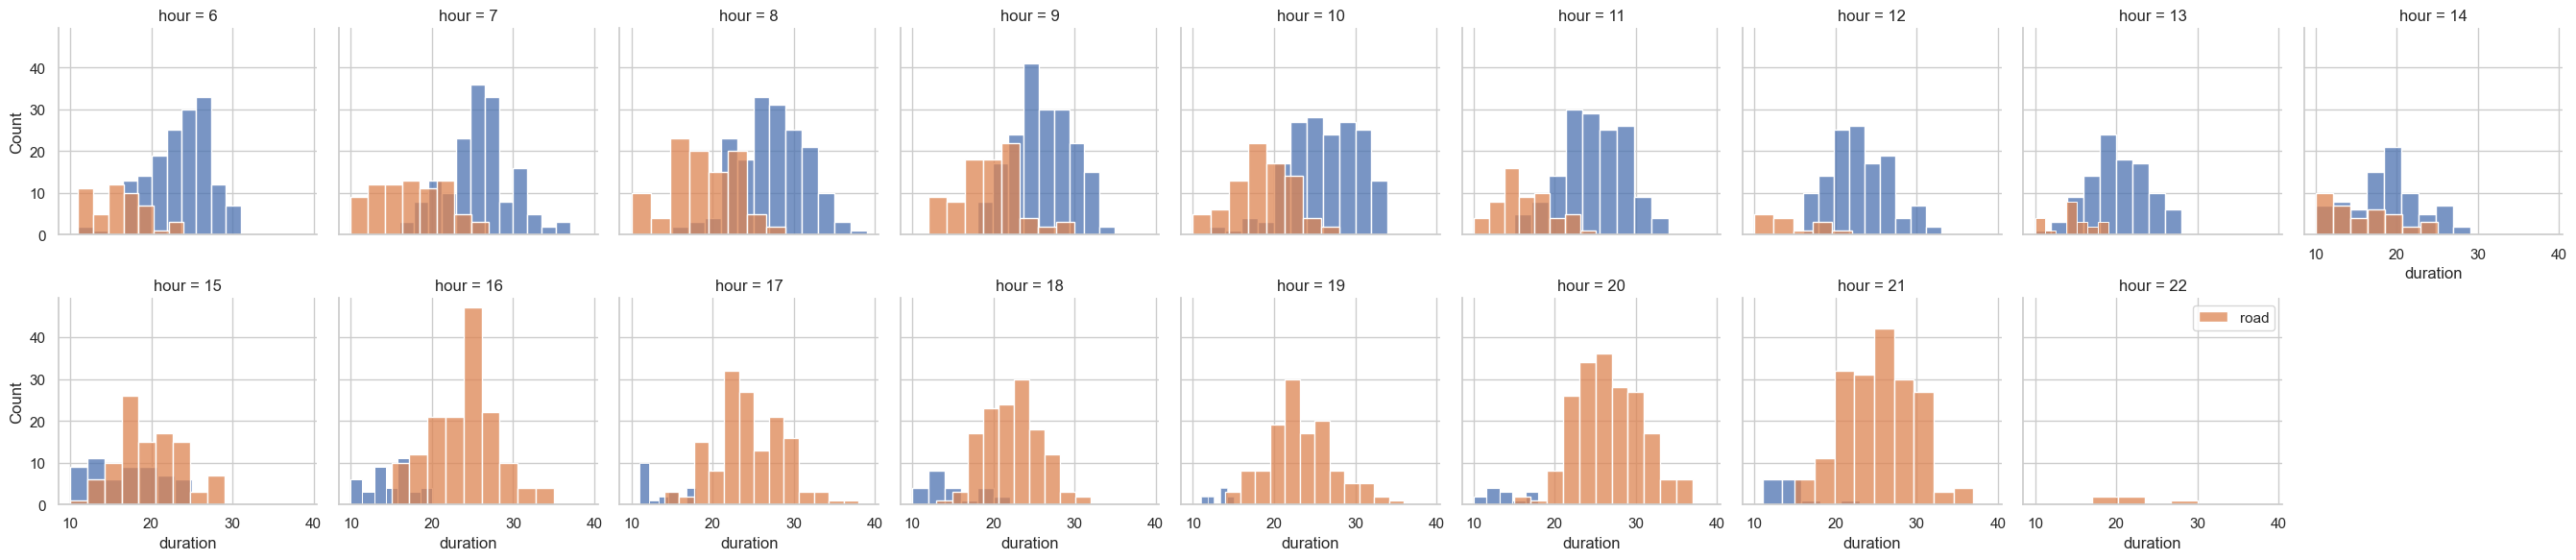

In [26]:
# Create a new column 'hour' by extracting the hour from the 'time' column
df['hour'] = df['time'].dt.hour

# Set the Seaborn style to "whitegrid"
sns.set(style="whitegrid")

# Create a FacetGrid with subplots for each hour, coloring by 'biketype'
g = sns.FacetGrid(df, col='hour', col_wrap=9, hue="biketype", sharey=True)

# Map a histogram plot for 'duration' on each subplot
g.map(sns.histplot, 'duration')

# Add a legend to the plot to explain the 'biketype' colors
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
# Import the module from the SciPy library. It provides various statistical functions and tests
import scipy.stats as stats

In [29]:
# Calculate the Pearson correlation coefficient (r) and p-value between "hour" and "duration" columns
r,p = stats.pearsonr(df['hour'],df['duration'])


# Print the calculated correlation coefficient and p-value
print(f'r={r:.2f}, p={p:.2f}')

r=0.02, p=0.29


In [30]:
# Calculate Pearson correlation coefficient (r) and p-value for 'mountain' bike type
rM,pM = stats.pearsonr(df['hour'][df.biketype=='mountain'], df['duration'][df.biketype=='mountain'])

# Calculate Pearson correlation coefficient (r) and p-value for 'road' bike type
rR,pR = stats.pearsonr(df['hour'][df.biketype=='road'], df['duration'][df.biketype=='road'])

# Print the calculated correlations and p-values with labels
print(f'Time-duration r for ROAD BIKES:     r={rR:.2f}, p={pR:.3f}')
print(f'Time-duration r for MOUNTAIN BIKES: r={rM:.2f}, p={pM:.3f}')

Time-duration r for ROAD BIKES:     r=0.57, p=0.000
Time-duration r for MOUNTAIN BIKES: r=-0.59, p=0.000


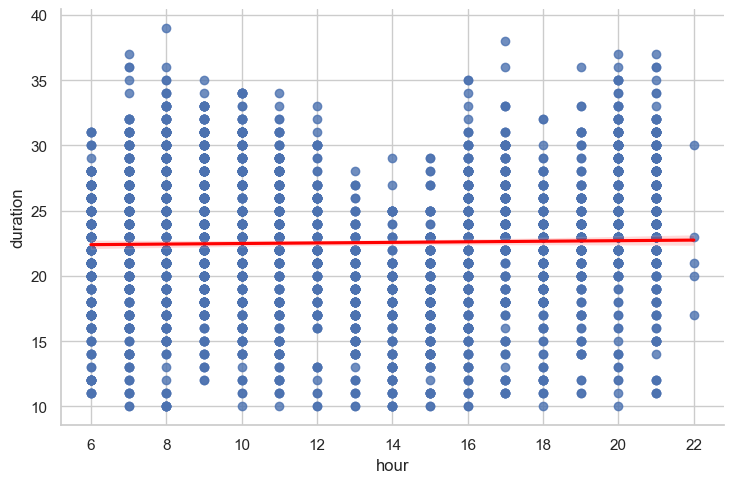

In [31]:
# Create a scatter plot with a red linear regression line for the relationship between 'hour' and 'duration'
# The aspect ratio is set to 1.5
sns.lmplot(data=df, x='hour', y='duration', aspect=1.5, line_kws={'color': 'red'})

plt.show()

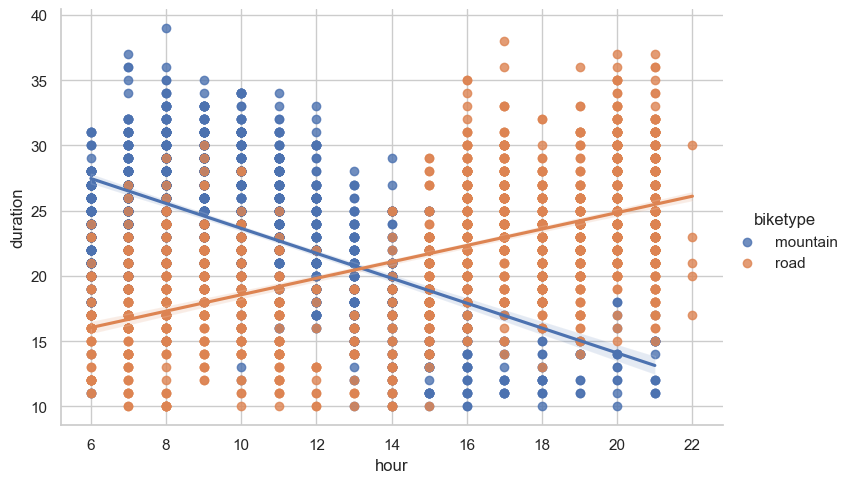

In [32]:
# Create a scatter plot with linear regression lines for the relationship between 'hour' and 'duration'
# Colors are differentiated by 'biketype', and the aspect ratio is set to 1.5

sns.lmplot(data=df,x='hour',y='duration',hue='biketype',aspect=1.5)
plt.show()

In [33]:
# Perform an independent two-sample t-test between "duration" values for 'road' and 'mountain' bike types
test = stats.ttest_ind(df["duration"][df.biketype == 'road'], df["duration"][df.biketype == 'mountain'])

# Print the t-statistic and p-value from the t-test
print(f't={test.statistic:.2f}, p={test.pvalue:.3f}')

t=-7.10, p=0.000


In [34]:
# Calculate the variance of "duration" values for the 'mountain' bike type
variance_mountain = df["duration"][df.biketype == 'mountain'].var()

# Calculate the variance of "duration" values for the 'road' bike type
variance_road = df["duration"][df.biketype == 'road'].var()

# Print the calculated variances for each bike type
print("Variance for 'mountain' bike type:", round(variance_mountain,2))
print("Variance for 'road' bike type:", round(variance_road,2))

Variance for 'mountain' bike type: 29.16
Variance for 'road' bike type: 27.96


In [35]:
# By passing equal_var=False as an argument to stats.ttest_ind, we are specifying that the t-test should be performed assuming unequal variances for the two samples
test = stats.ttest_ind(df["duration"][df.biketype == 'road'], df["duration"][df.biketype == 'mountain'], equal_var=False)

# Print the t-statistic and p-value from the t-test
print(f't={test.statistic:.2f}, p={test.pvalue:.3f}')

t=-7.10, p=0.000


<h2>End of the notebook </h2>